In [1]:
import os
import time

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)

In [3]:
root_path=os.getcwd()
keywords=os.listdir(root_path+'\\data\\')

In [4]:
root_path

'C:\\Users\\rfmen\\Desktop\\Competition'

In [6]:
for y in range(2017,2021):
    for m in range(1,13):
        begin=time.time()
        temp=[]
        if y==2017 and m<=5:
            continue
        elif y==2020 and m>=6:
            break
        else:
            for _ in keywords:
                try:
                    temp+=json.load(open('{}//data//{}//{}{}-{:02d}.json'.format(root_path,_,_,y,m)))
                except:
                    continue
            data1=[]
            for z in temp:
                if z['retweets']>0 or z['likes']>0 or z['is_replied'] or z['is_reply_to'] or z['replies']:
                    data1.append(z)
                    
            data1=total_clean(data1)
            
            result=[]
            for x,k in enumerate(data1):
                d=debug2(k['text']).items()
                if d: result.append(k['text'])
            with open("{}\\roughtext\\{}-{:02d}.txt".format(root_path,y,m), "w") as file:
                file.write(str(result))
            print(y,m,':',round(time.time()-begin,2),';',len(result),len(data1),len(temp))


2017 6 : 56.58 ; 3318 9064 29525
2017 7 : 60.88 ; 3894 9892 31555
2017 8 : 65.59 ; 4393 10773 32798
2017 9 : 65.4 ; 4271 10942 32773
2017 10 : 68.43 ; 4625 11178 33419
2017 11 : 74.69 ; 5275 11460 33669
2017 12 : 81.24 ; 5791 12267 35057
2018 1 : 84.67 ; 6004 12478 36247
2018 2 : 90.37 ; 7095 13271 36227
2018 3 : 86.19 ; 6702 12899 33694
2018 4 : 86.94 ; 6733 13131 33710
2018 5 : 88.08 ; 6505 12861 35987
2018 6 : 100.68 ; 7562 14692 36060
2018 7 : 91.91 ; 6469 13399 32474
2018 8 : 92.33 ; 6760 13356 32910
2018 9 : 100.49 ; 7596 14477 32494
2018 10 : 109.24 ; 8111 15730 36979
2018 11 : 91.75 ; 7118 13474 31210
2018 12 : 90.72 ; 6939 13164 31544
2019 1 : 93.43 ; 7256 13918 34161
2019 2 : 96.07 ; 7414 14199 33827
2019 3 : 89.01 ; 7208 13267 30870
2019 4 : 101.05 ; 7908 14901 34370
2019 5 : 105.84 ; 8402 15610 35372
2019 6 : 112.42 ; 8650 15987 31572
2019 7 : 97.68 ; 7074 14688 31167
2019 8 : 94.11 ; 7466 13464 28295
2019 9 : 92.64 ; 7185 13334 29044
2019 10 : 111.94 ; 8589 15948 34218
201

In [38]:
result=[]
for i in range(2015,2021):
    for j in range(1,13):
        try:
            with open("C:\\Users\\rfmen\\Desktop\\Competition\\roughmerging\\{}-{:02d}.txt".format(i,j), "r") as file:
                temp=eval(file.readline())
                result.append(temp)
        except:
            continue

In [40]:
def analyze(x):
    result={}
    for i in x:
        d=dict(i)
        for j in d:
            if j not in result:
                result[j]=(d[j],1)
            else:
                result[j]=(result[j][0]+d[j],result[j][1]+1)
    return list(result.items())

In [74]:
a=[analyze(i) for i in result]
month=[]
for y in range(2017,2021):
    for m in range(1,13):
        if y==2017 and m<=5:
            continue
        elif y==2020 and m>=6:
            break
        else:
            month.append('{}-{:02d}'.format(y,m))

In [165]:
for i in range(len(month)):
    temp=sorted(analyze(result[i]),key=lambda x: -x[1][1])
    #word=[i[0]+': '+str(round(i[1][0]/i[1][1],2)) for i in temp]
    word=[i[0] for i in temp]
    #print(month[i],'\t',word[2:])
    print(month[i],'\t',temp[10:20])

2017-06 	 [('wellsfargo', (-7, 34)), ('fraud', (-33, 33)), ('roboadvisor', (28, 32)), ('accounts', (-12, 29)), ('team', (23, 29)), ('thanks', (22, 28)), ('banks', (-6, 28)), ('millennials', (24, 26)), ('way', (11, 25)), ('roboadvisors', (3, 25))]
2017-07 	 [('consumers', (-29, 47)), ('time', (2, 40)), ('thanks', (19, 39)), ('people', (7, 37)), ('support', (37, 36)), ('issue', (-35, 35)), ('banks', (-1, 34)), ('way', (23, 33)), ('fraud', (-28, 32)), ('bank fraud', (-30, 32))]
2017-08 	 [('fraud', (-49, 48)), ('time', (14, 46)), ('accounts', (-22, 46)), ('people', (12, 45)), ('design thinking', (44, 44)), ('support', (42, 42)), ('issue', (-40, 41)), ('customers', (-15, 39)), ('problem', (-32, 36)), ('day', (26, 35))]
2017-09 	 [('market', (43, 45)), ('one', (39, 45)), ('thanks', (28, 42)), ('day', (27, 41)), ('banks', (0, 40)), ('advisors', (0, 33)), ('issues', (-37, 32)), ('job', (9, 30)), ('wellsfargo', (1, 29)), ('team', (18, 28))]
2017-10 	 [('fraud', (-53, 52)), ('wealth', (37, 49))

In [162]:
sorted(a[2],key=lambda x: -x[1][1])

[('bank', (-6, 96)),
 ('banks', (-20, 68)),
 ('innovation', (66, 66)),
 ('money', (1, 65)),
 ('scandal', (-56, 58)),
 ('wells fargo', (-34, 58)),
 ('issues', (-55, 54)),
 ('account', (4, 54)),
 ('work', (54, 52)),
 ('design', (48, 48)),
 ('fraud', (-49, 48)),
 ('time', (14, 46)),
 ('accounts', (-22, 46)),
 ('people', (12, 45)),
 ('design thinking', (44, 44)),
 ('support', (42, 42)),
 ('issue', (-40, 41)),
 ('customers', (-15, 39)),
 ('problem', (-32, 36)),
 ('day', (26, 35)),
 ('fees', (-18, 34)),
 ('service', (5, 33)),
 ('business', (6, 33)),
 ('thanks', (26, 32)),
 ('roboadvisors', (20, 32)),
 ('wealth', (7, 29)),
 ('app', (-9, 29)),
 ('inconvenience', (-28, 28)),
 ('market', (24, 28)),
 ('one', (17, 28)),
 ('management', (8, 28)),
 ('way', (17, 26)),
 ('tdameritrade', (2, 26)),
 ('team', (17, 25)),
 ('today', (13, 25)),
 ('shit', (-25, 25)),
 ('customer', (5, 24)),
 ('risk', (-21, 23)),
 ('wellsfargo', (-4, 23)),
 ('roboadvisor', (14, 22)),
 ('investment', (-2, 22)),
 ('businesses',

### Bitcoin

In [50]:
def bitcoin(a):
    block=['blockchain','cypto','bitcoin','btc','bch']
    bresult=[]
    for i in a:
        bresult.append([])
        for j in block:
            for k in i:
                if j in k[0].lower():
                    bresult[-1].append(k)
    num=[]
    freq=[]
    for i in bresult:
        if i:
            a,b=0,0
            for j in i:
                a+=j[1][0]
                b+=j[1][1]
            freq.append(b)
            num.append(a/b)
        else:
            num.append(0)
            freq.append(0)
    return num,freq

In [55]:
BTC=pd.read_csv('BTC-USD.csv')

In [73]:
len(month)

36

In [80]:
np.arange(0,36,3)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33])

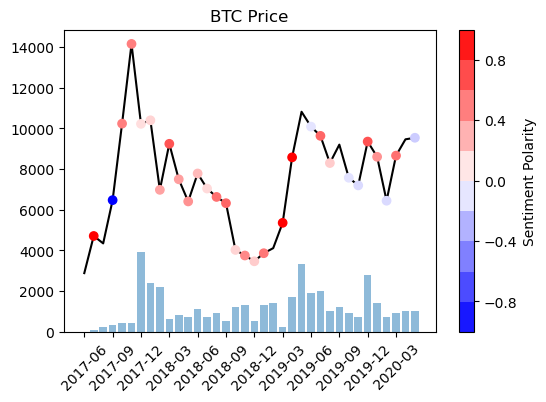

In [156]:
matplotlib.rcParams['figure.dpi'] = 100
BTC=pd.read_csv('BTC-USD.csv')
p=BTC['Adj Close'].iloc[-36:].values
num=np.array(bitcoin(a)[0])
freq=np.array(bitcoin(a)[1])
plt.plot(np.array(month),p,color='black',zorder=-1)
plt.scatter(np.array(month)[num!=0],p[num!=0],c=num[num!=0],cmap=cm.bwr)
plt.title('BTC Price')
locs,labels=plt.xticks(np.arange(36),[i if x%3==0 else '' for x,i in enumerate(month)],rotation=45)
ax=plt.gca()
for t in ax.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
plt.clim(-1,1)
plt.bar(month,100*freq,alpha=0.5)
cbar = plt.colorbar(boundaries=np.linspace(-1,1,11))
cbar.set_label('Sentiment Polarity')
plt.show()

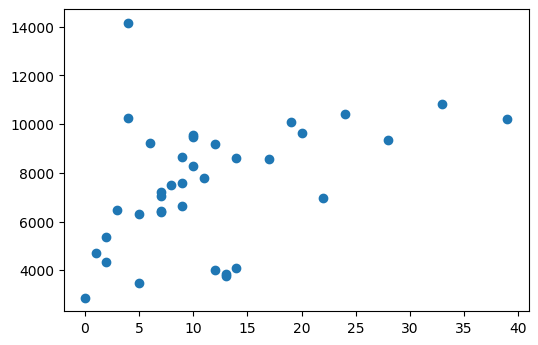

In [159]:
plt.scatter(freq,p)

In [166]:
def subsearch(a,keywords):
    bresult=[]
    for i in a:
        bresult.append([])
        for j in keywords:
            for k in i:
                if j in k[0].lower():
                    bresult[-1].append(k)
    num=[]
    freq=[]
    for i in bresult:
        if i:
            a,b=0,0
            for j in i:
                a+=j[1][0]
                b+=j[1][1]
            freq.append(b)
            num.append(a/b)
        else:
            num.append(0)
            freq.append(0)
    return num,freq

In [167]:
subsearch(a,['roboadvisor'])

([0.5666666666666667,
  0.72,
  0.40540540540540543,
  0.4411764705882353,
  0.6923076923076923,
  0.42857142857142855,
  0.4339622641509434,
  0.6865671641791045,
  0.39622641509433965,
  0.6301369863013698,
  0.9365079365079365,
  0.8181818181818182,
  0.84375,
  0.525,
  0.6888888888888889,
  0.5625,
  0.6041666666666666,
  0.696969696969697,
  0.48148148148148145,
  0.84,
  0.9473684210526315,
  0.4473684210526316,
  0.6129032258064516,
  0.26666666666666666,
  0.4482758620689655,
  0.4594594594594595,
  0.21739130434782608,
  0.6666666666666666,
  0.48484848484848486,
  0.6842105263157895,
  0.6,
  0.84,
  0.9210526315789473,
  0.35714285714285715,
  0.59375,
  0.7058823529411765],
 [60,
  50,
  74,
  34,
  39,
  49,
  53,
  67,
  53,
  73,
  63,
  33,
  32,
  40,
  45,
  32,
  48,
  33,
  27,
  25,
  19,
  38,
  31,
  30,
  29,
  37,
  23,
  21,
  33,
  19,
  25,
  25,
  38,
  28,
  32,
  34])